In [1]:
#%matplotlib nbagg
import broadbean as bb
import numpy as np
import tempfile
import qcodes as qc
import matplotlib.pyplot as plt
from sequencebuilder.alazar_config import alazarconfig
from broadbean.plotting import plotter
from qcodes.utils.dataset.doNd import do0d
from sequencebuilder.spinbuilder import AWGController
from qcodes import initialise_or_create_database_at, \
    load_or_create_experiment, Measurement, Parameter, \
    Station
ramp = bb.PulseAtoms.ramp

In [2]:
db_path = os.path.join(tempfile.gettempdir(),
                       'data_access_example.db')
initialise_or_create_database_at(db_path)

experiment = load_or_create_experiment(
    experiment_name='alazar',
    sample_name='alazar-sample')
SC = qc.Station(config_file="C:\\Users\\Farzad\\Documents\\Rasmus\\QCoDeS-experiment\\ConfigRBC.yaml")
AWGA = SC.load_instrument('AWGA')
seqbuild = AWGController(name = 'seqbuild', awg=AWGA)
SC.add_component(seqbuild)

Connected to: TEKTRONIX AWG5014C (serial:B051370, firmware:SCPI:99.0 FW:4.6.0.7) in 0.69s


'seqbuild'

In [3]:
t = 2e-6
eta1 = np.linspace(-0.1, 0.1, num=100, endpoint=True)
eta2 = np.linspace(0, 0.05, num=100, endpoint=True)
a1 = (0,0.1,t)
a2 = (0.1,0.1,t)
a3 = (0.2,0.3,t)
eta = (eta1, eta2,t)
readout = (0.2,0.2,t)
a5 = (0,0,t)
a6 = (-0.1,0,t)
seqbuild.spin_funnel_seq(a1, a2, a3, eta, readout, a5, a6)

I was here
I was here


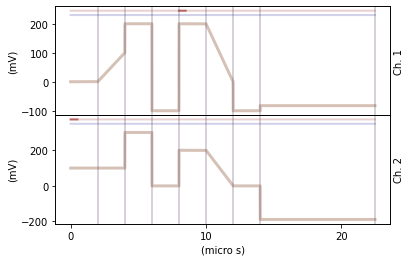

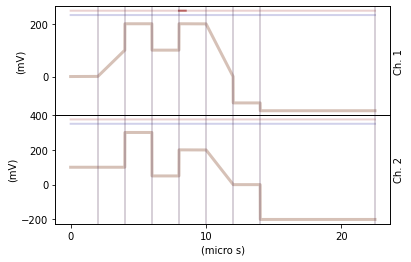

In [5]:
seqbuild.seq.plot_elem_nr(1)
seqbuild.seq.plot_elem_nr(100)

In [ ]:
t = 2e-6
etat = np.linspace(0.5, 5, num=100, endpoint=True)

a1 = (1,1,t)
a2 = (0.5,0.5,t)
a3 = (0.0,0.0,t)
a4 = (0.0,0.0,t)
eta = (0.0, 0.0,etat)
a5 = (0.0,0.0,t)
a6 = (0.5,0.5,t)
a7 = (1,1,t)
readout = (1,1,t)
a8 = (0.5,0.5,t)
a9 = (1,1,t)
seqbuild.exchange_seq_oneD(a1, a2, a3, a4, eta, a5, a6, a7,
                           readout, a8, a9)

In [6]:
seqbuild.uploadToAWG()

Sequence uploaded in 5.433859348297119 seconds


In [7]:
seqbuild.awg.ch1_state(1)
seqbuild.awg.ch2_state(1)

In [8]:
print(seqbuild.awg.ch1_state())
print(seqbuild.awg.ch2_state())


1
1


In [9]:
seqbuild.awg.run()

'Running'

In [10]:
seqbuild.awg.get_state()

'Running'

In [11]:
alazar = SC.load_instrument('alazar')
alazarconfig(alazar, seqmode=True,external_clock=False)
alazar_ctrl = SC.load_instrument('alazar_ctrl')
channelA_oneD = SC.load_instrument('channelA_oneD',parent=alazar_ctrl)
alazar_ctrl.channels.append(channelA_oneD)


In [12]:
alazar_ctrl.int_time(1.5e-6)
alazar_ctrl.int_delay(1e-7)
channelA_oneD.num_averages(300)
channelA_oneD.records_per_buffer(100)
channelA_oneD.prepare_channel()

#channelA_oneD.data.get()

Starting experimental run with id: 3. 


(results #3@C:\Users\Farzad\AppData\Local\Temp\data_access_example.db
 --------------------------------------------------------------------
 alazar_ctrl_channelA_oneD_records - array
 alazar_ctrl_channelA_oneD_data - array,
 [<AxesSubplot:title={'center':'Run #3, Experiment alazar (alazar-sample)'}, xlabel='Records', ylabel='mydata (mV)'>],
 [None])

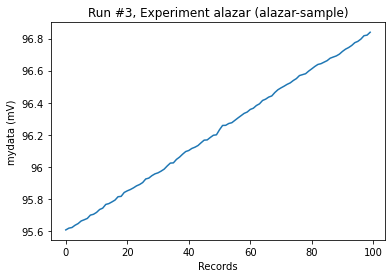

In [13]:
do0d(channelA_oneD.data, do_plot=True)

In [15]:
t = 2e-6
eta1 = np.linspace(-0.1, 0.1, num=100, endpoint=True)
etat = np.linspace(0.2*t, 5*t, num=100, endpoint=True)
a1 = (0,0.1,t)
a2 = (0.1,0.1,t)
a3 = (0.2,0.3,t)
eta = (0.3, 0.3,etat)
readout = (0.2,0.2,t)
a5 = (0,0,t)
a6 = (-0.1,0,t)
seqbuild.exchange_seq_oneD(a1, a2, a3, eta, readout, a5, a6)

I was here
I was here


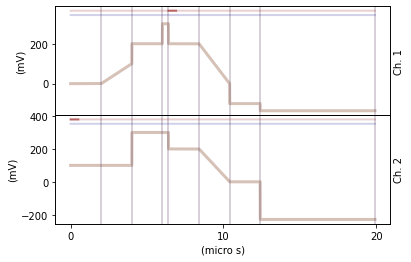

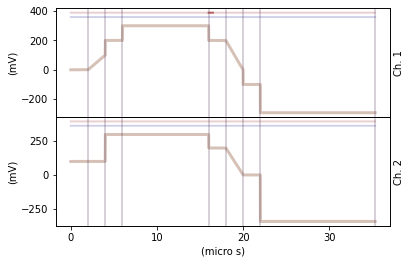

In [16]:
seqbuild.seq.plot_elem_nr(1)
seqbuild.seq.plot_elem_nr(100)

In [17]:
seqbuild.uploadToAWG()
seqbuild.awg.ch1_state(1)
seqbuild.awg.ch2_state(1)
print(seqbuild.awg.ch1_state())
print(seqbuild.awg.ch2_state())
seqbuild.awg.run()
seqbuild.awg.get_state()

Sequence uploaded in 6.628198862075806 seconds
1
1


'Running'

In [18]:
alazar_ctrl.int_time(1e-6)
alazar_ctrl.int_delay(1e-7)
channelA_oneD.num_averages(100)
channelA_oneD.records_per_buffer(100)
channelA_oneD.prepare_channel()


Starting experimental run with id: 4. 


(results #4@C:\Users\Farzad\AppData\Local\Temp\data_access_example.db
 --------------------------------------------------------------------
 alazar_ctrl_channelA_oneD_records - array
 alazar_ctrl_channelA_oneD_data - array,
 [<AxesSubplot:title={'center':'Run #4, Experiment alazar (alazar-sample)'}, xlabel='Records', ylabel='mydata (mV)'>],
 [None])

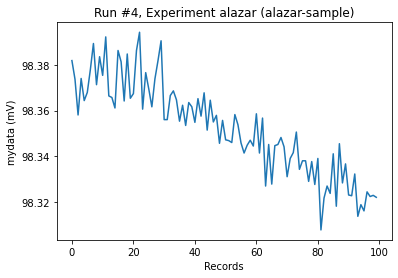

In [19]:
do0d(channelA_oneD.data, do_plot=True)